In the below steps, I will build a convolution neural network architecture and train the model on FER2013 dataset for Emotion recognition from images.

In [1]:
%matplotlib inline

#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os

import tensorflow as tf
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import cv2 #opencv 

from IPython.display import SVG, Image
# print("Tensorflow version:", tf.__version__)

#required libraries for song recommendation
import os
import sys
import json
import spotipy
import webbrowser
import spotipy.util as util
from json.decoder import JSONDecodeError

Initializing training and validation generators

In [2]:
train_dir = "./data/train" #train data
val_dir = "./data/test" #test data

#image augmentation-rescale - here it transforms every pixel values from range [0,255] to range [0,1] - this allows in treating all the images in the same manner (contributes evenly to the total loss)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

#this allows us to read the images directly from the directory and augument them when the neural network model is learning on the training data
train_generator = train_datagen.flow_from_directory( 
        train_dir,
        target_size=(48,48), #size of the input image
        batch_size=64, #no. of images to extract from folder for every batch
        color_mode="grayscale", #set to grayscale
        class_mode="categorical")#classes to predict

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode="categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Building convolutional neural network architecture

In [3]:
#sequential model
emotion_model = Sequential()

2022-12-09 18:43:19.870445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# build the model 
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1))) #learning a total of 32 filters

emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) #learning a total of 64 filters
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) # to reduce the spatial dimensions of the output volume or downsampling
emotion_model.add(Dropout(0.25)) #to reduce the occurrence of overfitting

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten()) # flattens the output of conolutional layer to 1D array
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))


In [5]:
#summary of the model
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

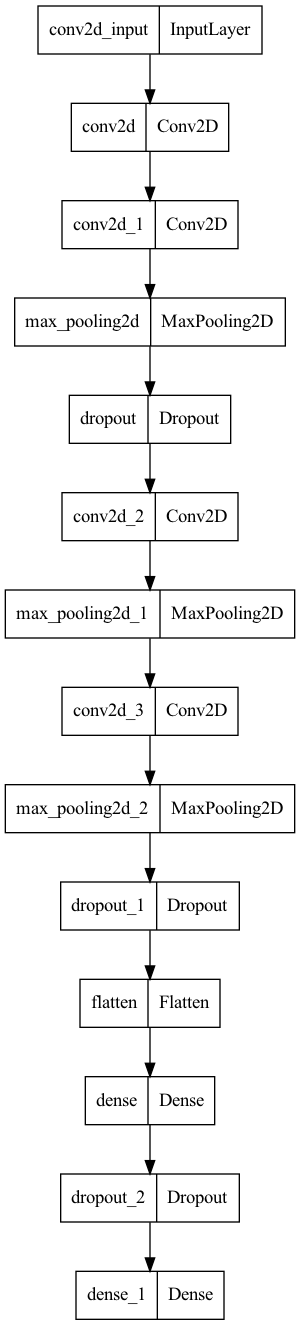

In [6]:
# to get the summary of the CNN architecture in a flow chart
plot_model(emotion_model, show_layer_names=True)

Compile and train the model

In [7]:
#configures the model for training
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy']) 

#training the model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64, #28709-training images
        epochs=50,
        validation_data=validation_generator, 
        validation_steps=7178 // 64) #7178-no. of validation images

Epoch 1/50


/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/var/folders/b4/wfw2y_5n1b5g09w18cs4j5d40000gn/T/ipykernel_77907/3547462453.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


448/448 [==============================] - 118s 261ms/step - loss: 1.8043 - accuracy: 0.2580 - val_loss: 1.7217 - val_accuracy: 0.3305
Epoch 2/50
448/448 [==============================] - 119s 266ms/step - loss: 1.6408 - accuracy: 0.3594 - val_loss: 1.5479 - val_accuracy: 0.4170
Epoch 3/50
448/448 [==============================] - 111s 249ms/step - loss: 1.5334 - accuracy: 0.4082 - val_loss: 1.4663 - val_accuracy: 0.4442
Epoch 4/50
448/448 [==============================] - 119s 265ms/step - loss: 1.4602 - accuracy: 0.4446 - val_loss: 1.4077 - val_accuracy: 0.4700
Epoch 5/50
448/448 [==============================] - 120s 267ms/step - loss: 1.4033 - accuracy: 0.4683 - val_loss: 1.3512 - val_accuracy: 0.4884
Epoch 6/50
448/448 [==============================] - 118s 264ms/step - loss: 1.3505 - accuracy: 0.4892 - val_loss: 1.3099 - val_accuracy: 0.5029
Epoch 7/50
448/448 [==============================] - 116s 259ms/step - loss: 1.3081 - accuracy: 0.5041 - val_loss: 1.2767 - val_accura

In [8]:
#saving the model weights
emotion_model.save_weights('emotion_model.h5')

In [9]:
# emotion_model.load_weights('emotion_model.h5')

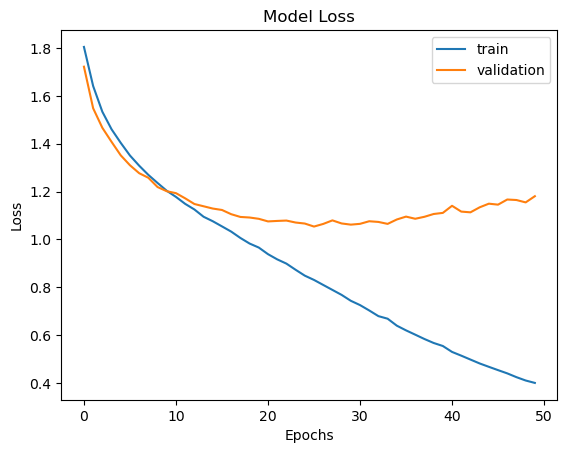

In [10]:
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

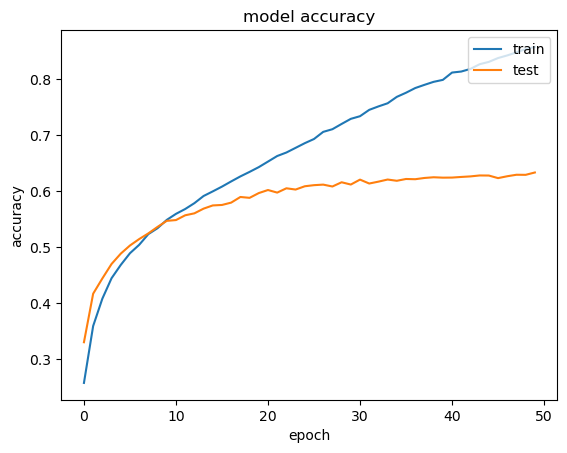

In [11]:
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

From the graph we can infer that after 10 epochs, there is an occurrence of overfitting. 

##### Emotion Prediction and Song Recommendation

In [13]:
#reading music data
music_data = pd.read_csv("./data/data_moods.csv")
music_data.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [14]:
#keeping relevant columns alone
music_data = music_data[['name','artist','popularity','mood','id']]
music_data.head()

,name,artist,popularity,mood,id
0,1999,Prince,68,Happy,2H7PHVdQ3mXqEHXcvclTB0
1,23,Blonde Redhead,43,Sad,4HIwL9ii9CcXpTOTzMq0MP
2,9 Crimes,Damien Rice,60,Sad,5GZEeowhvSieFDiR8fQ2im
3,99 Luftballons,Nena,2,Happy,6HA97v4wEGQ5TUClRM0XLc
4,A Boy Brushed Red Living In Black And White,Underoath,60,Energetic,47IWLfIKOKhFnz1FUEUIkE


In [15]:
#looking for categories present in mood feature
music_data['mood'].value_counts()

Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

 Using openCV haarcascade xml detect the bounding boxes of face in the webcam and predict the emotions

In [16]:
#mapping values to each emotion class
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [19]:
#for accessing webcam and quitting it using jupyter opencv
import opencv_jupyter_ui as jcv2

#0-used for my webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()
    
while True:
    #capture frame-by-frame
    ret, frame = cap.read()
    #if frame is read correctly ret is true
    if not ret:
        break
    bounding_box = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
    #operations on the frame
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #to find faces
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        #predicting the emotion
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        
        #based on the emotions - song recommendations
        if maxindex == 0 or maxindex == 2: #if mood is angry or fearful recommend calm music
            music = music_data[music_data['mood'] =='Calm']
            songs = music.sort_values(by="popularity", ascending=False)
            songs = songs[:5].reset_index(drop=True) #display top 5 calm songs that's most popular
            song_names = songs[['name','mood']].iloc[0] #storing the name of the song and mood of the most popular one
            song_name = str(song_names[0]) #only the name of the most popular music
            mood = str(song_names[1]) #the mood of the song recommended
            track_id = music_data.loc[music_data['name']==song_name, 'id'].item() #storing the track id of that song
#             display(songs)

        elif maxindex == 3 or maxindex == 4 or maxindex == 5: #if mood is happy or neutral or sad play happy songs
            music = music_data[music_data['mood'] =='Happy']
            songs = music.sort_values(by="popularity", ascending=False)
            songs = songs[:5].reset_index(drop=True) #display top 5 happy songs that's most popular
            song_names = songs[['name','mood']].iloc[0] #storing the name of the song and mood of the most popular one
            song_name = str(song_names[0]) #only the name of the most popular music
            mood = str(song_names[1]) #the mood of the song recommended
            track_id = music_data.loc[music_data['name']==song_name, 'id'].item() #storing the track id of that song
#             display(songs)

        elif maxindex == 6: #if mood is surprised then play energetic songs
            music = music_data[music_data['mood'] =='Energetic']
            songs = music.sort_values(by="popularity", ascending=False)
            songs = songs[:5].reset_index(drop=True) #display top 5 energetic songs that's most popular
            song_names = songs[['name','mood']].iloc[0] #storing the name of the song and mood of the most popular one
            song_name = str(song_names[0]) #only the name of the most popular music
            mood = str(song_names[1]) #the mood of the song recommended
            track_id = music_data.loc[music_data['name']==song_name, 'id'].item() #storing the track id of that song
#             display(songs)

        elif maxindex == 1: #if you're disgusted play sad song
            music = music_data[music_data['mood'] =='Sad']
            songs = music.sort_values(by="popularity", ascending=False)
            songs = songs[:5].reset_index(drop=True) #display top 5 sad songs that's most popular
            song_names = songs[['name','mood']].iloc[0] #storing the name of the song and mood of the most popular one
            song_name = str(song_names[0]) #only the name of the most popular music
            mood = str(song_names[1]) #the mood of the song recommended
            track_id = music_data.loc[music_data['name']==song_name, 'id'].item() #storing the track id of that song
#             display(songs)
         
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        #recommends the mood
        cv2.putText(frame, song_name, (x+40, y-80), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 240, 240), 2, cv2.LINE_AA)
        #recommends the most popular song of that mood
        cv2.putText(frame, mood, (x+60, y-100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 200, 200), 2, cv2.LINE_AA)
        
    #display the resulting frame
    jcv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if jcv2.waitKey(1)==ord('q'):
        break
 

1/1 [==============================] - 0s 16ms/step
Exection is stopped


In [20]:
# When everything done, release the capture
cap.release()
jcv2.destroyAllWindows()
cv2.destroyAllWindows()

In [22]:
#for song recommendation and playing at Spotify
#my spotify app details
username = 'your_username' #add user's username
clientID = 'your_clientid' #add user's clientID 
clientSecret = 'your_clientsecretid' #add user's client secret id
redirectURI = 'http://google.com/'

#permissions
scope = 'user-read-private user-read-playback-state user-modify-playback-state'

# Create OAuth Object
oauth_object = spotipy.SpotifyOAuth(clientID,clientSecret,redirectURI, scope=scope)
# Create token
token_dict = oauth_object.get_access_token()
token = token_dict['access_token']

# Create Spotify Object
spotifyObject = spotipy.Spotify(auth=token)

#get current device
devices = spotifyObject.devices()
print(json.dumps(devices, sort_keys=True, indent=4)) #printing json of devices to find where the key was
deviceID = devices['devices'][0]['id'] #my laptop - where spotify is open

#goes to spotify app in my desktop plays the recommended song
spotifyObject.start_playback(deviceID, uris=[f'spotify:track:{track_id}'])

/var/folders/b4/wfw2y_5n1b5g09w18cs4j5d40000gn/T/ipykernel_77907/2664815398.py:14: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_dict = oauth_object.get_access_token()


{
    "devices": [
        {
            "id": "714558c451ced2488a0db7d2f9fbb6013fbf05af",
            "is_active": false,
            "is_private_session": false,
            "is_restricted": false,
            "name": "Amrutha\u2019s MacBook Pro",
            "type": "Computer",
            "volume_percent": 100
        }
    ]
}


In [23]:
#displays 5 most popular songs for the mood detected or recommends the 5 popular songs
display(songs)

,name,artist,popularity,mood,id
0,Pumped Up Kicks,Foster The People,84,Happy,7w87IxuO7BDcJ3YUqCyMTT
1,Africa,TOTO,84,Happy,2374M0fQpWi3dLnB54qaLX
2,Take on Me,a-ha,84,Happy,2WfaOiMkCvy7F5fcp2zZ8L
3,Highway to Hell,AC/DC,83,Happy,2zYzyRzz6pRmhPzyfMEC8s
4,Here Comes The Sun - Remastered 2009,The Beatles,83,Happy,6dGnYIeXmHdcikdzNNDMm2
